In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [193]:
# IMPORT MAIN DATASET
import pandas as pd
ECL = pd.read_csv("export1.csv")
ECL.head()

,STICHTAG_MANDANT_LAUF_RECHT_AN,REPORTING_DATE,CLIENT,KEY_RUN,KEY_REPORTING_REGULATION,TRANSACTION_ID,KEY_TRANSACTION_CAT,GROUP_CONS_COMPANIES_ID,KEY_SECURITISATION_VIEW,KEY_PRIMARY_RISK_PARTNER,...,LGD_PR_UNCOL_IFRS_Y2,LGD_PR_UNCOL_IFRS_Y3,ASSET_CLASS_TRANSACTION_IRB,IME_TRANS_CLUSTER_ID,THRESHOLD_PD_ADJUSTED,FLAG_PRIVATI_LIKE,SCONF_NO_FIDO,SEGMENTO_INTERNO,CALIB_DRIVER,CLB_DRIVER_PRE_WS
0,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,24036126_REPO,R,,B,P,...,0.0,0.0,BS,24036126_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
1,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,24037558_REPO,R,,B,P,...,0.0,0.0,BA,24037558_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
2,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,24038130_REPO,R,,B,P,...,0.0,0.0,BS,24038130_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
3,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,24081965_REPO,R,,B,P,...,0.0,0.0,BS,24081965_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
4,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,30374682_REPO,R,,B,P,...,0.0,0.0,BA,30374682_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ECL.shape

(1593, 70)

In [194]:
# Drop all columns that have all NAs
ECL.dropna(axis=1, how='all', inplace=True)

In [5]:
ECL.shape

(1593, 58)

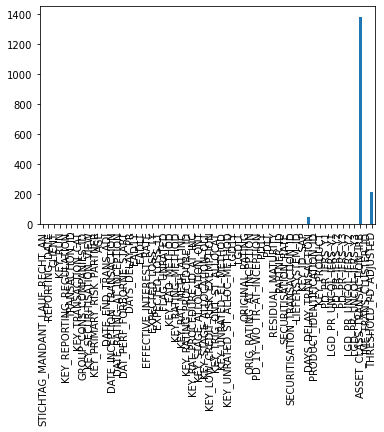

In [204]:
ECL.isna().sum().plot.bar();

In [209]:
# Drop all columns that have any NAs as not relevant for the study
ECL.dropna(axis=1, how='any', inplace=True)

In [207]:
ECL.shape

(1593, 55)

In [215]:
max(ECL["EAD1Y"])

500830511.1

In [216]:
np.mean(ECL["PD1Y"])

0.0013509141242937929

In [82]:
ECL.columns

Index(['STICHTAG_MANDANT_LAUF_RECHT_AN', 'REPORTING_DATE', 'CLIENT', 'KEY_RUN',
       'KEY_REPORTING_REGULATION', 'TRANSACTION_ID', 'KEY_TRANSACTION_CAT',
       'GROUP_CONS_COMPANIES_ID', 'KEY_SECURITISATION_VIEW',
       'KEY_PRIMARY_RISK_PARTNER', 'AGE', 'DATE_END_TRANS_ADJ',
       'DATE_INCEPTION_TRANSACTION', 'DATE_RATING_AT_INCEPTION',
       'DAT_PERF_FORBORNE_START', 'DAYS_DELAY_PR', 'EAD1Y', 'EADLT',
       'EFFECTIVE_INTEREST_RATE', 'EXPECTED_LOSS_1Y', 'EXPECTED_LOSS_LT',
       'FLAG_UNRATED', 'KEY_EAD_METHOD', 'KEY_RATING_METHOD',
       'KEY_RAT_METH_AT_INC', 'KEY_RATING_PROCEDURE_ID',
       'KEY_RAT_PROCEDURE_ID_AT_INC', 'KEY_STAGE_ALLOCATION_QNT',
       'KEY_STAGE_ALLOCATION_QLT', 'KEY_LOW_CREDIT_RISK_EXEMPTION',
       'KEY_TRIG_QNT_ST_ALLOCAT', 'KEY_UNRATED_EL_METHOD',
       'KEY_UNRATED_ST_ALLOC_METHOD', 'LGD1Y', 'LGDLT', 'ORIGINAL_RATING',
       'ORIG_RATING_AT_INCEPTION', 'PD_1Y_WO_TR_AT_INCEPTION', 'PD1Y', 'PDLT',
       'RESIDUAL_MATURITY', 'PARTNER_ID', 'SE

In [8]:
ECL_study = ECL[['REPORTING_DATE', 'PARTNER_ID', 'TRANSACTION_ID', 'EAD1Y', 'EXPECTED_LOSS_1Y', 'PD1Y', 'KEY_LOW_CREDIT_RISK_EXEMPTION', 'ORIGINAL_RATING', 'ORIG_RATING_AT_INCEPTION']].copy(deep=True)
ECL_study.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION
0,30-SEP-19,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5
1,30-SEP-19,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6
2,30-SEP-19,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8
3,30-SEP-19,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5
4,30-SEP-19,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7


In [9]:
ECL_study.dtypes

REPORTING_DATE                    object
PARTNER_ID                         int64
TRANSACTION_ID                    object
EAD1Y                            float64
EXPECTED_LOSS_1Y                 float64
PD1Y                             float64
KEY_LOW_CREDIT_RISK_EXEMPTION     object
ORIGINAL_RATING                   object
ORIG_RATING_AT_INCEPTION          object
dtype: object

In [10]:
ECL_study["PARTNER_ID"] = ECL_study["PARTNER_ID"].astype(str)

In [11]:
ECL_study.dtypes

REPORTING_DATE                    object
PARTNER_ID                        object
TRANSACTION_ID                    object
EAD1Y                            float64
EXPECTED_LOSS_1Y                 float64
PD1Y                             float64
KEY_LOW_CREDIT_RISK_EXEMPTION     object
ORIGINAL_RATING                   object
ORIG_RATING_AT_INCEPTION          object
dtype: object

In [12]:
ECL_study["REPORTING_DATE"] = pd.to_datetime(ECL_study["REPORTING_DATE"], infer_datetime_format=True)

In [43]:
ECL_study.dtypes

REPORTING_DATE                   datetime64[ns]
PARTNER_ID                               object
TRANSACTION_ID                           object
EAD1Y                                   float64
EXPECTED_LOSS_1Y                        float64
PD1Y                                    float64
KEY_LOW_CREDIT_RISK_EXEMPTION            object
ORIGINAL_RATING                          object
ORIG_RATING_AT_INCEPTION                 object
dtype: object

In [30]:
ECL_study[ (ECL_study["REPORTING_DATE"] == "2019-09-30") &
          (ECL_study["PARTNER_ID"] == "30374682")]

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7
6,2019-09-30,30374682,CN_DEPOSITS_37408863,4.794454e+06,4139.10,0.002076,N,B7,B7
10,2019-09-30,30374682,IS_SECTRANS_IT0003781652_AC_1,5.000000e+08,441434.77,0.002076,J,B7,B7
11,2019-09-30,30374682,IS_SECTRANS_IT0003782718_AC_1,5.000422e+08,442026.60,0.002076,J,B7,B7
12,2019-09-30,30374682,IS_SECTRANS_IT0003795132_AC_1,4.487671e+08,396244.19,0.002076,J,B7,B7
13,2019-09-30,30374682,IS_SECTRANS_IT0003934301_AC_1,3.500179e+08,309466.93,0.002076,J,B7,B7
14,2019-09-30,30374682,IS_SECTRANS_IT0003934350_AC_1,3.500562e+08,309729.01,0.002076,J,B7,B7
87,2019-09-30,30374682,CN_DEPOSITS_35484635,3.833056e+07,33434.31,0.002076,N,B7,B7
207,2019-09-30,30374682,NO_CURRENT__100000011_1000000_11_CHF,2.087484e+04,18.43,0.002076,N,B7,B7
208,2019-09-30,30374682,NO_CURRENT__100000011_1000000_11_EUR,2.792893e+06,2465.28,0.002076,N,B7,B7


In [105]:
# FILTER
ECL_study[ (ECL_study["REPORTING_DATE"] == "2020-03-31") &
          (ECL_study["EXPECTED_LOSS_1Y"] > 1000000)]

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION
453,2020-03-31,9132323,IS_SECTRANS_IT0000366655_AC_1,3.994692e+08,1102616.11,0.004444,J,S8,S8


In [113]:
ECL_study.sort_values(by=["PARTNER_ID", "EXPECTED_LOSS_1Y"], ascending=False)

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION
867,2020-09-30,9132323,IS_SECTRANS_IT0000366655_AC_1,3.994061e+08,1466627.02,0.005905,J,S8,S8
453,2020-03-31,9132323,IS_SECTRANS_IT0000366655_AC_1,3.994692e+08,1102616.11,0.004444,J,S8,S8
664,2020-06-30,9132323,IS_SECTRANS_IT0000366655_AC_1,3.907436e+08,1011863.62,0.004169,J,S8,S8
890,2020-09-30,9132323,IS_SECTRANS_US465410BG26_AC_1,1.735269e+08,514345.30,0.005905,J,S8,S8
976,2020-09-30,9132323,IS_SECTRANS_IT0005327306_FVTOCI_1,2.387986e+08,433749.69,0.005905,J,S8,S8
...,...,...,...,...,...,...,...,...,...
9,2019-09-30,1432750,CN_LOANS____11098915,1.504327e+08,159194.50,0.001739,X,B14,B14
223,2019-12-31,1432750,CN_LOANS____11098915,1.232064e+08,111927.13,0.001529,X,B14,B14
443,2020-03-31,1432750,CN_LOANS____11098915,8.583576e+07,77577.76,0.001478,X,B13,B14
654,2020-06-30,1432750,CN_LOANS____11098915,4.848194e+07,44681.76,0.001502,X,B13,B14


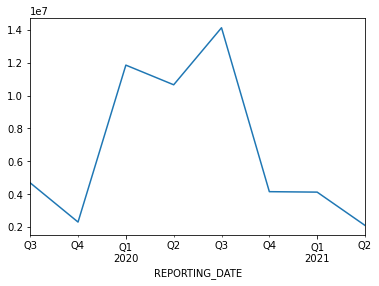

In [121]:
ECL_study.groupby("REPORTING_DATE")["EXPECTED_LOSS_1Y"].sum().plot();

In [61]:
# SET INDEX 
ECL_study_indexed = ECL_study.set_index(["REPORTING_DATE", "TRANSACTION_ID"])
ECL_study_indexed.head()

PARTNER_ID         EAD1Y  EXPECTED_LOSS_1Y  \
REPORTING_DATE TRANSACTION_ID                                              
2019-09-30     24036126_REPO    24036126  3.359181e+05            156.94   
               24037558_REPO    24037558  1.211426e+07           6042.41   
               24038130_REPO    24038130  1.476728e+05            171.94   
               24081965_REPO    24081965  8.414928e+05            419.59   
               30374682_REPO    30374682  1.032456e+08          91134.62   

                                   PD1Y KEY_LOW_CREDIT_RISK_EXEMPTION  \
REPORTING_DATE TRANSACTION_ID                                           
2019-09-30     24036126_REPO   0.001221                           N     
               24037558_REPO   0.001601                           N     
               24038130_REPO   0.002555                           N     
               24081965_REPO   0.001240                           N     
               30374682_REPO   0.002076                           N     

                              ORIGINAL_RATING ORIG_RATING_AT_INCEPTION  
REPORTING_DATE TRANSACTION_ID                                           
2019-09-30     24036126_REPO               B5                       B5  
               24037558_REPO               B6                       B6  
               24038130_REPO               B8                       B8  
               24081965_REPO               B5                       B5  
               30374682_REPO               B7                       B7

In [125]:
ECL_study_indexed.sort_index(ascending=False)

PARTNER_ID         EAD1Y  \
REPORTING_DATE TRANSACTION_ID                                                  
2021-06-30     NO_CURRENT__100000050_1000289_51_EUR   24045513  3.135000e+02   
               NO_CURRENT__100000011_1000000_11_EUR   30374682  2.793028e+07   
               NO_CURRENT__100000011_1000000_11_CHF   30374682  1.668194e+04   
               NO_CURRENT__100000010_1000289_51_EUR   24045513  2.581085e+04   
               NO_CURRENT__100000010_1000002_11_GBP   24036038  7.410084e+04   
...                                                        ...           ...   
2019-09-30     30374682_REPO                          30374682  1.032456e+08   
               24081965_REPO                          24081965  8.414928e+05   
               24038130_REPO                          24038130  1.476728e+05   
               24037558_REPO                          24037558  1.211426e+07   
               24036126_REPO                          24036126  3.359181e+05   

                                                     EXPECTED_LOSS_1Y  \
REPORTING_DATE TRANSACTION_ID                                           
2021-06-30     NO_CURRENT__100000050_1000289_51_EUR              0.06   
               NO_CURRENT__100000011_1000000_11_EUR          19525.24   
               NO_CURRENT__100000011_1000000_11_CHF             11.66   
               NO_CURRENT__100000010_1000289_51_EUR              4.98   
               NO_CURRENT__100000010_1000002_11_GBP             16.07   
...                                                               ...   
2019-09-30     30374682_REPO                                 91134.62   
               24081965_REPO                                   419.59   
               24038130_REPO                                   171.94   
               24037558_REPO                                  6042.41   
               24036126_REPO                                   156.94   

                                                         PD1Y  \
REPORTING_DATE TRANSACTION_ID                                   
2021-06-30     NO_CURRENT__100000050_1000289_51_EUR  0.001019   
               NO_CURRENT__100000011_1000000_11_EUR  0.001787   
               NO_CURRENT__100000011_1000000_11_CHF  0.001787   
               NO_CURRENT__100000010_1000289_51_EUR  0.001019   
               NO_CURRENT__100000010_1000002_11_GBP  0.000928   
...                                                       ...   
2019-09-30     30374682_REPO                         0.002076   
               24081965_REPO                         0.001240   
               24038130_REPO                         0.002555   
               24037558_REPO                         0.001601   
               24036126_REPO                         0.001221   

                                                    KEY_LOW_CREDIT_RISK_EXEMPTION  \
REPORTING_DATE TRANSACTION_ID                                                       
2021-06-30     NO_CURRENT__100000050_1000289_51_EUR                           N     
               NO_CURRENT__100000011_1000000_11_EUR                           N     
               NO_CURRENT__100000011_1000000_11_CHF                           N     
               NO_CURRENT__100000010_1000289_51_EUR                           N     
               NO_CURRENT__100000010_1000002_11_GBP                           N     
...                                                                           ...   
2019-09-30     30374682_REPO                                                  N     
               24081965_REPO                                                  N     
               24038130_REPO                                                  N     
               24037558_REPO                                                  N     
               24036126_REPO                                                  N     

                                                    ORIGINAL_RATING  \
REPORTING_DATE TRANSACTION_ID         

In [103]:
ECL_study_indexed.loc[("2019-09-30", "24036126_REPO"), "PARTNER_ID":"PD1Y"]

,,PARTNER_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y
REPORTING_DATE,TRANSACTION_ID,,,,
2019-09-30,24036126_REPO,24036126,335918.08,156.94,0.001221


In [83]:
ECL_study_indexed.iloc[0:101, 0]

REPORTING_DATE  TRANSACTION_ID               
2019-09-30      24036126_REPO                    24036126
                24037558_REPO                    24037558
                24038130_REPO                    24038130
                24081965_REPO                    24081965
                30374682_REPO                    30374682
                                                   ...   
                IS_SECTRANS_IT0005244782_AC_2     9132323
                IS_SECTRANS_IT0005252520_AC_1     9132323
                IS_SECTRANS_IT0005252520_AC_2     9132323
                IS_SECTRANS_IT0005252520_AC_3     9132323
                IS_SECTRANS_IT0005359846_AC_1     9132323
Name: PARTNER_ID, Length: 101, dtype: object

In [53]:
ECL_study["PARTNER_ID"].nunique()

37

In [14]:
ECL_study.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION
0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5
1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6
2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8
3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7


In [ ]:
#Importing Pandas and a reading a file (CSV) into a Pandas Data Frame using the relative path

In [87]:
import pandas as pd
partner = pd.read_csv("export2Partner.csv")

In [ ]:
# Initial exploration of data in preparation of subsetting: I am interested in Partner ID and Country Code

In [88]:
partner.head()

,PARTNER_ID,STICHTAG,MANDANT,STICHTAG_MANDANT_LAUF,SL_ABWEICH_LAENDERRISIKOLAND,SL_POLITISCHES_SITZLAND,SL_RECHTLICHES_LAND,PARTNERART,KZ_MANDANTENINTERNER_PARTNER,SL_RECHTSFORM,...,KZ_SME_THRESHOLD_NOT_EXC_STA,SL_CVA_COUNTERPARTY_CLASS,KZ_ELIGIBLE_SETTING_MATUR_1_Y,DAT_LEGAL_PROC_INIT,SL_ENTERPRISE_SIZE,SL_STATUS_LEGAL_PROC,SL_INTRAGROUP_EXPOSURE_CRR_113,SL_LEGAL_FORM_ECB,SL_TYPE_OF_ENTITY,KZ_GOVERNMENT_SUPPORT
0,24045513,30-JUN-21,2200,21063002200A,XXX,IE,7,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN
1,24038001,30-JUN-21,2200,21063002200A,XXX,BE,17,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN
2,24053273,30-JUN-21,2200,21063002200A,XXX,XIO,912,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN
3,87010403,30-JUN-21,2200,21063002200A,XXX,DE,39,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN
4,23670755,30-JUN-21,2200,21063002200A,XXX,NL,3,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN


In [18]:
partner.shape

(76, 82)

In [19]:
partner.columns

Index(['PARTNER_ID', 'STICHTAG', 'MANDANT', 'STICHTAG_MANDANT_LAUF',
       'SL_ABWEICH_LAENDERRISIKOLAND', 'SL_POLITISCHES_SITZLAND',
       'SL_RECHTLICHES_LAND', 'PARTNERART', 'KZ_MANDANTENINTERNER_PARTNER',
       'SL_RECHTSFORM', 'SL_ORGANBEZIEHUNG', 'SL_SONDERPARTNER_GS1',
       'SL_TEILPORTFOLIO_STA', 'SL_TEILPORTFOLIO_IRB', 'DAT_GEBURT',
       'SL_LEISTUNGSSTATUS', 'KZ_15_TAGE_WAHLRECHT', 'KZ_ANONYMISIERUNG',
       'KZ_PRIVILEGIERTE_INSTITUTION', 'KZ_HANDWERKER', 'KZ_SPV',
       'KZ_BEAUF_INVESTMENTF_PENSIONSK', 'PARTNERNAME', 'PARTNERVORNAME',
       'PARTNERNACHNAME', 'SITZ_ORT', 'SITZ_POSTLEITZAHL', 'SITZ_STRASSE',
       'GEBURTSORT', 'TITEL', 'SL_HINWEIS', 'REPORTINGINFORMATION',
       'JAHRESEINKOMMEN', 'SL_PARTNERKLASSE_INTERN',
       'KZ_LEISTUNGSSTATUS_AUTOMATISCH', 'SL_UNTERNEHMENSART_AUFSICHTSR',
       'KZ_LANGFRISTIGE_KUNDENBEZ', 'KZ_HEDGEFONDS',
       'KZ_UNMITTELBARE_AUSFALLERKENN', 'SL_GEWERBE',
       'KZ_SCHULDNERUEBERWACHUNG', 'LIEFERSYSTEM_ID',
      

In [89]:
# After having identified the columns containing the country codes per counterparty, I create a subset
# of the table partner called "CPTY_Country_codes". I will need this to merge it with GDP information
# per country  during the COVID pandemic.
CPTY_Country_codes = partner[["PARTNER_ID", 'SL_POLITISCHES_SITZLAND', 'SL_LEGAL_COUNTRY_ISO_3166_1_A2']].copy(deep=True)
CPTY_Country_codes.head()

,PARTNER_ID,SL_POLITISCHES_SITZLAND,SL_LEGAL_COUNTRY_ISO_3166_1_A2
0,24045513,IE,IE
1,24038001,BE,BE
2,24053273,XIO,LU
3,87010403,DE,CH
4,23670755,NL,NL


In [20]:
CPTY_Country_codes.shape

(76, 3)

In [21]:
CPTY_Country_codes.dtypes

PARTNER_ID                         int64
SL_POLITISCHES_SITZLAND           object
SL_LEGAL_COUNTRY_ISO_3166_1_A2    object
dtype: object

In [90]:
CPTY_Country_codes["PARTNER_ID"] = CPTY_Country_codes["PARTNER_ID"].astype(str)

In [97]:
CPTY_Country_codes.dtypes

PARTNER_ID                        object
SL_POLITISCHES_SITZLAND           object
SL_LEGAL_COUNTRY_ISO_3166_1_A2    object
dtype: object

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

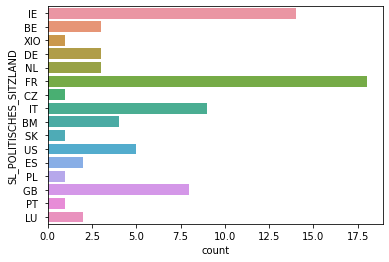

In [93]:
sns.countplot(data=CPTY_Country_codes, y="SL_POLITISCHES_SITZLAND");

In [94]:
CPTY_Country_codes.rename(columns={"SL_POLITISCHES_SITZLAND": "COUNTRY_OF_RISK", "SL_LEGAL_COUNTRY_ISO_3166_1_A2" : "LEGAL_COUNTRY"}, inplace=True)
CPTY_Country_codes.head()

,PARTNER_ID,COUNTRY_OF_RISK,LEGAL_COUNTRY
0,24045513,IE,IE
1,24038001,BE,BE
2,24053273,XIO,LU
3,87010403,DE,CH
4,23670755,NL,NL


In [41]:
CPTY_Country_codes["Diff"].sum()

'0000000000000000000000000000000000000000000000000000000000000000000000000000'

In [95]:
ECL_Study_CPTY_Country_Codes = ECL_study.merge(CPTY_Country_codes, how="left")
ECL_Study_CPTY_Country_Codes.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,COUNTRY_OF_RISK,LEGAL_COUNTRY
0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5,FR,FR
1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6,DE,DE
2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8,IT,IT
3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5,FR,FR
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7,IT,IT


In [39]:
ECL_Study_CPTY_Country_Codes.shape

(1593, 11)

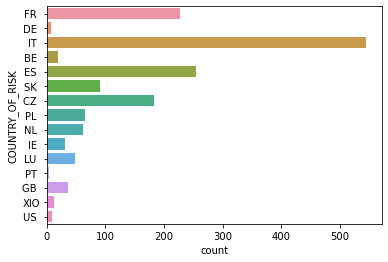

In [185]:
sns.countplot(data=ECL_Study_CPTY_Country_Codes, y="COUNTRY_OF_RISK");

In [85]:
ECL_Study_CPTY_Country_Codes.isnull().sum()

REPORTING_DATE                    0
PARTNER_ID                        0
TRANSACTION_ID                    0
EAD1Y                             0
EXPECTED_LOSS_1Y                  0
PD1Y                              0
KEY_LOW_CREDIT_RISK_EXEMPTION     0
ORIGINAL_RATING                   0
ORIG_RATING_AT_INCEPTION          0
COUNTRY_OF_RISK                   4
LEGAL_COUNTRY                     4
EL_1Y/EAD_1Y                     20
dtype: int64

In [86]:
ECL_Study_CPTY_Country_Codes.fillna(0) 

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,COUNTRY_OF_RISK,LEGAL_COUNTRY,EL_1Y/EAD_1Y
0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5,FR,FR,4.671972
1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6,DE,DE,4.987851
2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8,IT,IT,11.643306
3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5,FR,FR,4.986258
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7,IT,IT,8.826970
...,...,...,...,...,...,...,...,...,...,...,...,...
1588,2021-06-30,24158450,IS_SECTRANS_XS0750894577_FVTOCI_21,4.693901e+07,91.67,0.000006,J,S3,S3,CZ,CZ,0.019530
1589,2021-06-30,24036841,NO_CURRENT__100000010_1000001_11_USD,3.116480e+06,518.04,0.000250,N,B4,B4,US,US,1.662260
1590,2021-06-30,24036038,NO_CURRENT__100000010_1000002_11_GBP,7.410084e+04,16.07,0.000928,N,B6,B6,GB,GB,2.168666
1591,2021-06-30,30374682,NO_CURRENT__100000011_1000000_11_EUR,2.793028e+07,19525.24,0.001787,N,B7,B7,IT,IT,6.990706


In [87]:
ECL_Study_CPTY_Country_Codes.isnull().sum()

REPORTING_DATE                    0
PARTNER_ID                        0
TRANSACTION_ID                    0
EAD1Y                             0
EXPECTED_LOSS_1Y                  0
PD1Y                              0
KEY_LOW_CREDIT_RISK_EXEMPTION     0
ORIGINAL_RATING                   0
ORIG_RATING_AT_INCEPTION          0
COUNTRY_OF_RISK                   4
LEGAL_COUNTRY                     4
EL_1Y/EAD_1Y                     20
dtype: int64

In [41]:
ECL_Study_CPTY_Country_Codes.dtypes

REPORTING_DATE                    datetime64[ns]
PARTNER_ID                                object
TRANSACTION_ID                            object
EAD1Y                                    float64
EXPECTED_LOSS_1Y                         float64
PD1Y                                     float64
KEY_LOW_CREDIT_RISK_EXEMPTION             object
ORIGINAL_RATING                           object
ORIG_RATING_AT_INCEPTION                  object
SL_POLITISCHES_SITZLAND                   object
SL_LEGAL_COUNTRY_ISO_3166_1_A2            object
dtype: object

In [96]:
ECL_Study_CPTY_Country_Codes["EL_1Y/EAD_1Y"] = ECL_Study_CPTY_Country_Codes["EXPECTED_LOSS_1Y"]/ECL_Study_CPTY_Country_Codes["EAD1Y"]*10000
ECL_Study_CPTY_Country_Codes.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,COUNTRY_OF_RISK,LEGAL_COUNTRY,EL_1Y/EAD_1Y
0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5,FR,FR,4.671972
1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6,DE,DE,4.987851
2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8,IT,IT,11.643306
3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5,FR,FR,4.986258
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7,IT,IT,8.826970


In [41]:
ECL_Study_CPTY_Country_Codes.corr()


,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,EL_1Y/EAD_1Y
EAD1Y,1.000000,0.808955,0.250511,0.348635
EXPECTED_LOSS_1Y,0.808955,1.000000,0.424864,0.562676
PD1Y,0.250511,0.424864,1.000000,0.931470
EL_1Y/EAD_1Y,0.348635,0.562676,0.931470,1.000000


In [239]:
#groupby Date and counterparty
ECL_Grouped = ECL_Study_CPTY_Country_Codes.groupby(["REPORTING_DATE", "PARTNER_ID"])["EXPECTED_LOSS_1Y"].sum()
ECL_Grouped

REPORTING_DATE  PARTNER_ID
2019-09-30      1432750       473100.10
                17461434       69066.43
                1754026         9218.49
                19854145        5869.01
                24030685          96.69
                                ...    
2021-06-30      34944058         650.11
                36624468         619.33
                39582211        1877.84
                84785786         523.82
                9132323       556026.88
Name: EXPECTED_LOSS_1Y, Length: 267, dtype: float64

In [244]:
P9132323 = ECL_Study_CPTY_Country_Codes[ECL_Study_CPTY_Country_Codes["PARTNER_ID"] == "9132323"]
P9132323

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,COUNTRY_OF_RISK,LEGAL_COUNTRY,EL_1Y/EAD_1Y
15,2019-09-30,9132323,IS_SECTRANS_IT0005244782_AC_1,2.486691e+07,10202.95,0.001212,J,S8,S8,IT,IT,4.103023
16,2019-09-30,9132323,IS_SECTRANS_IT0005244782_AC_3,4.973382e+07,20405.89,0.001212,J,S8,S8,IT,IT,4.103021
17,2019-09-30,9132323,IS_SECTRANS_IT0005244782_AC_4,2.486691e+07,10202.95,0.001212,J,S8,S8,IT,IT,4.103023
18,2019-09-30,9132323,IS_SECTRANS_IT0005246340_AC_1,1.039358e+08,38656.25,0.001212,J,S8,S8,IT,IT,3.719244
19,2019-09-30,9132323,IS_SECTRANS_US465410BG26_AC_1,1.865785e+08,109005.94,0.001212,J,S8,S8,IT,IT,5.842365
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2021-06-30,9132323,IS_SECTRANS_IT0005277444_FVTOCI_2,5.090871e+07,8508.02,0.000470,J,S8,S8,IT,IT,1.671231
1552,2021-06-30,9132323,IS_SECTRANS_IT0005277444_FVTOCI_4,5.090871e+07,8508.02,0.000470,J,S8,S8,IT,IT,1.671231
1553,2021-06-30,9132323,IS_SECTRANS_IT0005327306_FVTOCI_1,2.385792e+08,37129.01,0.000470,J,S8,S8,IT,IT,1.556255
1554,2021-06-30,9132323,IS_SECTRANS_IT0005327306_FVTOCI_4,2.120704e+08,33003.57,0.000470,J,S8,S8,IT,IT,1.556256


In [107]:
import numpy as np
ECL_Study_CPTY_Country_Codes.pivot_table(values = "EXPECTED_LOSS_1Y", index = ["PARTNER_ID"], columns=["REPORTING_DATE"], fill_value=0, aggfunc=np.sum, margins=True)

REPORTING_DATE,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,All
PARTNER_ID,,,,,,,,,
1432750,473100.10,382831.11,346230.70,317560.95,387958.54,328660.21,339866.65,273272.45,2849480.71
17461434,69066.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69066.43
1754026,9218.49,4329.78,33358.18,30989.05,44479.81,11803.32,11974.42,3688.39,149841.44
19854145,5869.01,5484.28,9074.64,8406.63,7280.04,4375.09,4613.34,4196.92,49299.95
24030685,96.69,376.62,2996.42,718.78,268.51,84.96,489.96,97.37,5129.31
24035267,0.00,0.00,0.00,0.00,0.00,0.00,413.32,326.18,739.50
24036038,22.59,5.92,36.38,26.36,27.63,20.25,22.46,16.07,177.66
24036126,156.94,12.04,0.00,117.71,0.00,0.00,0.00,78.74,365.43
24036841,2108.57,302.59,3730.41,1744.97,1750.24,155.06,105.51,518.04,10415.39


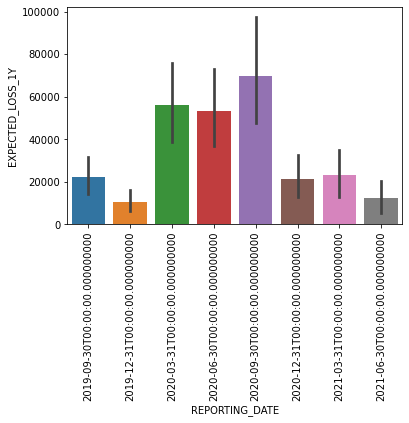

In [101]:
g = sns.barplot(data=ECL_Study_CPTY_Country_Codes, x="REPORTING_DATE", y="EXPECTED_LOSS_1Y")
plt.xticks(rotation=90);

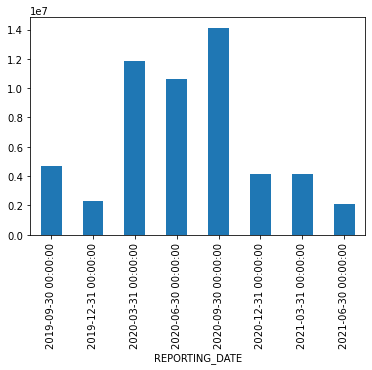

In [62]:
ECL_Study_CPTY_Country_Codes.groupby('REPORTING_DATE').sum()['EXPECTED_LOSS_1Y'].plot.bar();

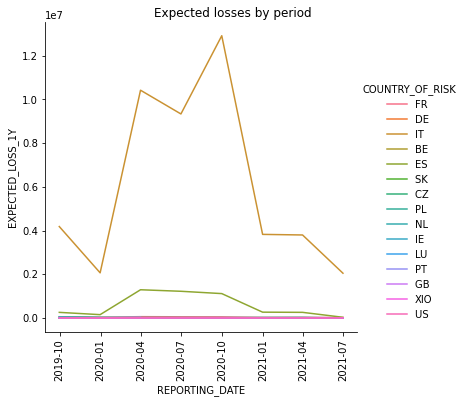

In [219]:
g = sns.relplot(data=ECL_Study_CPTY_Country_Codes, x="REPORTING_DATE", y="EXPECTED_LOSS_1Y",
                kind="line", hue="COUNTRY_OF_RISK", ci=None, estimator=sum);
g.fig.suptitle("Expected losses by period")
plt.xticks(rotation=90);

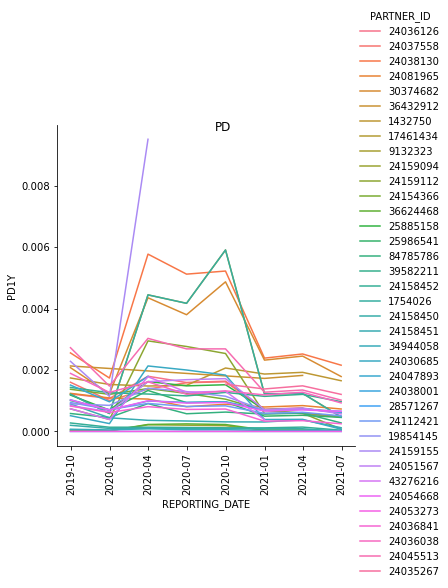

In [230]:
g = sns.relplot(data=ECL_Study_CPTY_Country_Codes, x="REPORTING_DATE", y="PD1Y",
                kind="line", hue="PARTNER_ID", ci=None);
g.fig.suptitle("PD")
plt.xticks(rotation=90);

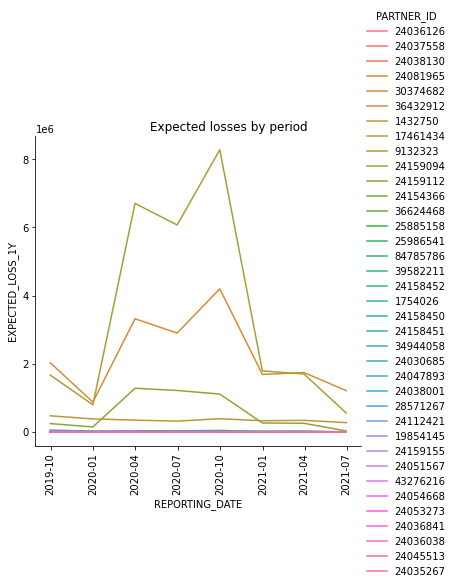

In [180]:
g = sns.relplot(data=ECL_Study_CPTY_Country_Codes, x="REPORTING_DATE", y="EXPECTED_LOSS_1Y",
                kind="line", hue="PARTNER_ID", ci=None, estimator=sum);
g.fig.suptitle("Expected losses by period")
plt.xticks(rotation=90);

In [150]:
ECL_Study_CPTY_Country_Codes2 = ECL_Study_CPTY_Country_Codes[ECL_Study_CPTY_Country_Codes["PARTNER_ID"]
                     .isin(["30374682", "1432750", "9132323", "24159112"])]
ECL_Study_CPTY_Country_Codes2.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,COUNTRY_OF_RISK,LEGAL_COUNTRY,EL_1Y/EAD_1Y
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7,IT,IT,8.826970
6,2019-09-30,30374682,CN_DEPOSITS_37408863,4.794454e+06,4139.10,0.002076,N,B7,B7,IT,IT,8.633100
7,2019-09-30,1432750,CN_LOANS____11098902,3.001338e+08,313905.60,0.001739,X,B14,B14,IT,IT,10.458856
9,2019-09-30,1432750,CN_LOANS____11098915,1.504327e+08,159194.50,0.001739,X,B14,B14,IT,IT,10.582439
10,2019-09-30,30374682,IS_SECTRANS_IT0003781652_AC_1,5.000000e+08,441434.77,0.002076,J,B7,B7,IT,IT,8.828695


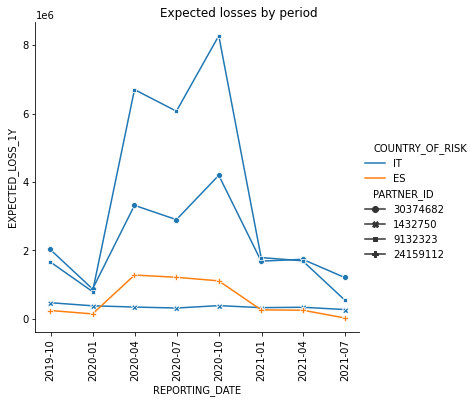

In [174]:
g = sns.relplot(data=ECL_Study_CPTY_Country_Codes2, x="REPORTING_DATE", y="EXPECTED_LOSS_1Y",
                kind="line", hue="COUNTRY_OF_RISK", style="PARTNER_ID", ci=None, estimator="sum", markers=True, dashes=False);
g.fig.suptitle("Expected losses by period")
g.set_xticklabels(rotation=90);


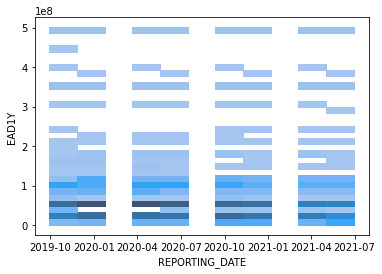

In [226]:
g = sns.histplot(data=ECL_Study_CPTY_Country_Codes2, x="REPORTING_DATE", y="EAD1Y")


In [290]:
ECL_Study_CPTY_Country_Codes3 = ECL_Study_CPTY_Country_Codes2.groupby(by="REPORTING_DATE")

In [291]:
ECL_Study_CPTY_Country_Codes3.head(10)

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,COUNTRY_OF_RISK,LEGAL_COUNTRY,EL_1Y/EAD_1Y
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7,IT,IT,8.826970
6,2019-09-30,30374682,CN_DEPOSITS_37408863,4.794454e+06,4139.10,0.002076,N,B7,B7,IT,IT,8.633100
7,2019-09-30,1432750,CN_LOANS____11098902,3.001338e+08,313905.60,0.001739,X,B14,B14,IT,IT,10.458856
9,2019-09-30,1432750,CN_LOANS____11098915,1.504327e+08,159194.50,0.001739,X,B14,B14,IT,IT,10.582439
10,2019-09-30,30374682,IS_SECTRANS_IT0003781652_AC_1,5.000000e+08,441434.77,0.002076,J,B7,B7,IT,IT,8.828695
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,2021-06-30,30374682,IS_SECTRANS_IT0003934350_AC_1,3.500000e+08,245571.82,0.001787,J,B7,B7,IT,IT,7.016338
1430,2021-06-30,9132323,IS_SECTRANS_IT0005045270_AC_2,5.181625e+07,8523.67,0.000470,J,S8,S8,IT,IT,1.644980
1431,2021-06-30,9132323,IS_SECTRANS_IT0005127086_AC_2,1.510432e+08,18560.27,0.000470,J,S8,S8,IT,IT,1.228806
1432,2021-06-30,9132323,IS_SECTRANS_IT0005244782_AC_1,1.881599e+07,3447.56,0.000470,J,S8,S8,IT,IT,1.832250


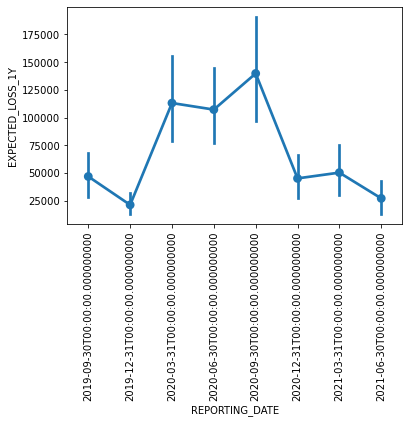

In [233]:
g = sns.pointplot(data=ECL_Study_CPTY_Country_Codes2, x="REPORTING_DATE", y="EXPECTED_LOSS_1Y", figsize=(18,18))
plt.xticks(rotation=90);


In [188]:
def trend(column):
    return column / column -1


AttributeError: module 'pandas' has no attribute 'read_txt'

In [247]:
GDP = pd.read_excel("Data_Extract_From_World_Development_Indicators.xlsx")
print(GDP)

                                         Series Name        Series Code  \
0                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
1                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
2                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
3                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
4                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
5                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
6                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
7                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
8                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
9                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
10                             GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
11                             GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
12                       

In [251]:
Country_Codes_ISO = {"Country Name":['Belgium', 'Czech Republic', 'Italy', 'Portugal', 'France', "Germany", "Ireland", "Netherlands", 
                               "Slovak Republic", "Spain" , "United Kingdom", "United States", "Luxembourg", "Poland"],
                    "Code_ISO": ["BE", "CZ", "IT", "PT", "FR", "DE", "IE", "NL", "SK", "ES", "UK", "US", "LU", "PL"]}


,Country Name,Code_ISO
0,Belgium,BE
1,Czech Republic,CZ
2,Italy,IT
3,Portugal,PT
4,France,FR
5,Germany,DE
6,Ireland,IE
7,Netherlands,NL
8,Slovak Republic,SK
9,Spain,ES


In [257]:
df = pd.DataFrame(Country_Codes_ISO)

In [260]:
GDP_merged = GDP.merge(df, on="Country Name")
GDP_merged.head()

,Series Name,Series Code,Country Name,Country Code,2019 [YR2019],2020 [YR2020],Code_ISO
0,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Belgium,BEL,1.784694,-6.283930,BE
1,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Czech Republic,CZE,2.313605,-5.602304,CZ
2,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Italy,ITA,0.287450,-8.871146,IT
3,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Portugal,PRT,2.488959,-7.563616,PT
4,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,France,FRA,1.508594,-8.114907,FR


In [269]:
GDP_merged.rename(columns={"2019 [YR2019]": "2019", "2020 [YR2020]" : "2020"}, inplace=True)
GDP_merged.head()

,Series Name,Series Code,Country Name,Country Code,2019,2020,Code_ISO
0,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Belgium,BEL,1.784694,-6.283930,BE
1,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Czech Republic,CZE,2.313605,-5.602304,CZ
2,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Italy,ITA,0.287450,-8.871146,IT
3,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Portugal,PRT,2.488959,-7.563616,PT
4,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,France,FRA,1.508594,-8.114907,FR


In [270]:
GDP_merged_tall = GDP_merged.melt(id_vars=["Country Name", "Code_ISO"], value_vars=["2019", "2020"], var_name=["YEAR"], value_name="GDP growth (annual %)")
GDP_merged_tall.head(15)

,Country Name,Code_ISO,YEAR,GDP growth (annual %)
0,Belgium,BE,2019,1.784694
1,Czech Republic,CZ,2019,2.313605
2,Italy,IT,2019,0.287450
3,Portugal,PT,2019,2.488959
4,France,FR,2019,1.508594
5,Germany,DE,2019,0.555451
6,Ireland,IE,2019,5.565201
7,Netherlands,NL,2019,1.677418
8,Slovak Republic,SK,2019,2.511588
9,Spain,ES,2019,1.950127


In [295]:
GDP_merged_tall["year"] = pd.to_datetime(GDP_merged_tall["YEAR"], infer_datetime_format=True)
GDP_merged_tall

,Country Name,Code_ISO,YEAR,GDP growth (annual %),year
0,Belgium,BE,2019,1.784694,2019-01-01
1,Czech Republic,CZ,2019,2.313605,2019-01-01
2,Italy,IT,2019,0.287450,2019-01-01
3,Portugal,PT,2019,2.488959,2019-01-01
4,France,FR,2019,1.508594,2019-01-01
5,Germany,DE,2019,0.555451,2019-01-01
6,Ireland,IE,2019,5.565201,2019-01-01
7,Netherlands,NL,2019,1.677418,2019-01-01
8,Slovak Republic,SK,2019,2.511588,2019-01-01
9,Spain,ES,2019,1.950127,2019-01-01


In [297]:
GDP_merged_tall.set_index("year")

,Country Name,Code_ISO,YEAR,GDP growth (annual %)
year,,,,
2019-01-01,Belgium,BE,2019,1.784694
2019-01-01,Czech Republic,CZ,2019,2.313605
2019-01-01,Italy,IT,2019,0.287450
2019-01-01,Portugal,PT,2019,2.488959
2019-01-01,France,FR,2019,1.508594
2019-01-01,Germany,DE,2019,0.555451
2019-01-01,Ireland,IE,2019,5.565201
2019-01-01,Netherlands,NL,2019,1.677418
2019-01-01,Slovak Republic,SK,2019,2.511588


In [299]:
pd.merge_ordered(ECL_Study_CPTY_Country_Codes, GDP_merged_tall, left_on=["REPORTING_DATE", 'COUNTRY_OF_RISK'], right_on=["year", "Code_ISO"])

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,COUNTRY_OF_RISK,LEGAL_COUNTRY,EL_1Y/EAD_1Y,Country Name,Code_ISO,YEAR,GDP growth (annual %),year
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgium,BE,2019,1.784694,2019-01-01
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Czech Republic,CZ,2019,2.313605,2019-01-01
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,DE,2019,0.555451,2019-01-01
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,ES,2019,1.950127,2019-01-01
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,FR,2019,1.508594,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,2021-06-30,24158452,IS_SECTRANS_SK4120009044_FVTOCI_3,10731845.89,177.79,4.130000e-05,J,S5,S5,SK,SK,0.165666,NaN,NaN,NaN,NaN,NaT
1617,2021-06-30,24158452,IS_SECTRANS_SK4120009044_FVTOCI_6,10731845.89,177.79,4.130000e-05,J,S5,S5,SK,SK,0.165666,NaN,NaN,NaN,NaN,NaT
1618,2021-06-30,24158452,IS_SECTRANS_SK4120009044_FVTOCI_7,5365922.94,88.89,4.130000e-05,J,S5,S5,SK,SK,0.165656,NaN,NaN,NaN,NaN,NaT
1619,2021-06-30,24036841,NO_CURRENT__100000010_1000001_11_USD,3116479.58,518.04,2.498000e-04,N,B4,B4,US,US,1.662260,NaN,NaN,NaN,NaN,NaT
